# 에지 검출과 응용

In [1]:
import cv2
import numpy as np
import sys

## 마스크 기반 에지 검출 - 소벨 마스크

In [2]:
src = cv2.imread("./data/lenna.bmp", cv2.IMREAD_GRAYSCALE)

Mx = np.array(
    [[-1, 0, 1],
     [-2, 0, 2],
     [-1, 0, 1]], dtype= np.float32) # 소벨 마스크 (x방향 미분 마스크)

My = np.array(
    [[-1, -2, -1],
     [0, 0, 0],
     [1, 2, 1]], dtype= np.float32) # 소벨 마스크 (y방향 미분 마스크)

dx = cv2.filter2D(src, -1, Mx, delta=128) # dx : x방향 필터와 원본 이미지 간의 마스크 연산의 결과(미분값)
dy = cv2.filter2D(src, -1, My, delta=128) # dy : y방향 필터와 원본 이미지 간의 마스크 연산의 결과(미분값)

cv2.imshow("src", src)
cv2.imshow("dx", dx)
cv2.imshow("dy", dy)
cv2.waitKey()
cv2.destroyAllWindows()

In [3]:
src = cv2.imread("./data/lenna.bmp", cv2.IMREAD_GRAYSCALE)

# sobel mask 준비 없이, 원본간의 마스크 연산을 한번에..
dx = cv2.Sobel(src, cv2.CV_32FC1, 1, 0) # dx : x방향 필터와 원본 이미지 간의 마스크 연산의 결과(미분값)
dy = cv2.Sobel(src, cv2.CV_32FC1, 0, 1) # dy : y방향 필터와 원본 이미지 간의 마스크 연산의 결과(미분값)
# --> cv2.filter2D()와 다르게 타입이 float32이고, 포화연산이 안되어 있는 상태

fmag = cv2.magnitude(dx, dy) # dx, dy 각각의 미분값을 벡터(그레디언트)의 크기로 반환
mag = np.clip(fmag, 0, 255).astype(np.uint8)

T = 160
_, edge = cv2.threshold(mag, T, 255, cv2.THRESH_BINARY)


cv2.imshow("src", src)
cv2.imshow("mag", mag)
cv2.imshow("edge", edge)
cv2.waitKey()
cv2.destroyAllWindows()

## 캐니 에지 검출기

In [4]:
src = cv2.imread("./data/lenna.bmp", cv2.IMREAD_GRAYSCALE)

# low threshold, high threshold를 변경해 가면서 영상 결과 확인
dst1 = cv2.Canny(src, 50, 100) 
dst2 = cv2.Canny(src, 100, 200)

cv2.imshow("dst1", dst1)
cv2.imshow("dst2", dst2)
cv2.waitKey()
cv2.destroyAllWindows()

## 허프 변환 직선 검출

In [5]:
import math

In [6]:
src = cv2.imread("./data/building.jpg", cv2.IMREAD_GRAYSCALE)


edge = cv2.Canny(src, 100, 200) #(src, low threshold, high threshold)
                                # low:high = 1:2, 1:3

rho = 1
theta = math.pi/180.
threshold = 160 # 축적배열에 직선으로 많이 교차하는 위치의 값이 threshold 이상 넘어갈 때 직선으로 간주
minlineLength = 50
maxlineGap = 5
lines = cv2.HoughLinesP(edge, rho, theta, threshold,minLineLength= minlineLength, maxLineGap=maxlineGap)

dst = cv2.cvtColor(edge,cv2.COLOR_GRAY2BGR)
if lines is not None: # 라인 정보를 받았으면
    for i in range(lines.shape[0]):
        pt1 = (lines[i][0][0], lines[i][0][1])
        pt2 = (lines[i][0][2], lines[i][0][3])
        cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)
        
cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
src = cv2.imread("./data/building.jpg", cv2.IMREAD_GRAYSCALE)

for i in range(100, 200, 10):
    edge = cv2.Canny(src, 80, 240) #(src, low threshold, high threshold) #보통 1:2~3 비율로 한다. 
    rho = 1
    theta = math.pi/180.
if lines is not None: 
        for i in range(lines.shape[0]):
            pt1 = (lines[i][0][0], lines[i][0][1])
            pt2 = (lines[i][0][2], lines[i][0][3])
            cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)
            dst_1 = cv2.cvtColor(edge,cv2.COLOR_GRAY2BGR)
            desc_1 = 'HoughLinesP: minlineLength %d' % (minlineLength_1)
            cv2.putText(dst_1, desc_1, (10,590), cv2.FONT_HERSHEY_SIMPLEX, 1.0,200,1,cv2.LINE_AA)
if lines_1 is not None: 
        for i in range(lines_1.shape[0]):
            pt1 = (lines_1[i][0][0], lines_1[i][0][1])
            pt2 = (lines_1[i][0][2], lines_1[i][0][3])
            cv2.line(dst_1, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)
            
cv2.imshow('dst_1',dst_1)
cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()


NameError: name 'minlineLength_1' is not defined

## 허프 변환 원 검출

In [9]:
src = cv2.imread("./data/coins.png", cv2.IMREAD_GRAYSCALE)

blurred=cv2.blur(src,(3,3))


In [10]:
cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=50, 
                 param1=150, param2=30)
            


array([[[173.5, 119.5,  28.8],
        [119.5, 207.5,  29.6],
        [216.5,  69.5,  27.9],
        [146.5,  33.5,  27.9],
        [108.5,  82.5,  22.4],
        [ 94.5, 145.5,  28.5],
        [264.5, 101.5,  24.1],
        [ 55.5,  49.5,  24.1],
        [235.5, 173.5,  24.6],
        [ 36.5, 108.5,  30.3]]], dtype=float32)

In [ ]:
dst = cv2,cvtColor(src, cv2.COLOR_GRAY2BGR) #bgr로 3차원으로 바꾸기
if circles is not None:
    for i in range(circles.shape[1]):
        cx, cy, radius= circles[0][i]
        cv2.circle(dst,(np.unit32(cx),np.unit32(cy)), np.unit32(radius), (0,0,255),2)

In [ ]:
cv2.imshow('src ',src)
cv2.imshow('blurred',blurred)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
##컬러 영상 다루기

In [ ]:
Color Picker Tool로 해당 이미지 색상의 RGB 코드값 얻어오기
https://annystudio.com/software/colorpicker/#download

In [ ]:
##차선인식

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

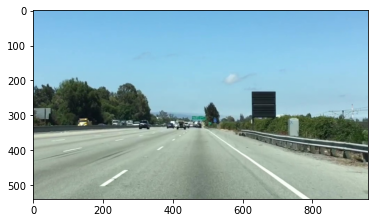

In [16]:
#using matplotlib
image = mpimg.imread('./data/test.jpg') #RGB
plt.imshow(image)

In [ ]:
#color section

In [ ]:
color_select=np.copy(image)
#흰색: rgb= 255
red_threshold=
green_threshold=
blue_threshold=


threshold = ((image[:,:,0] <red_threshold) #R channel
              (image[:,:,1] <green_threshold)#G channel
              (image[:,:,2] <blue_threshold))#B channel

color_selection[threshold] = 0,0,0

In [ ]:
color_select = np.copy(image)

# todo
red_threshold = ###
green_threshold = ###
blue_threshold = ###

thresholds = ((image[:, :, 0] < red_threshold) | # R channel
              (image[:, :, 1] < green_threshold) | # G channel
              (image[:, :, 2] < blue_threshold)) # B channel

color_select[thresholds] = [0, 0, 0]


In [ ]:
##region select

In [ ]:
region_select=np.copy(image)
rows=region_select.shape[0]-1
cols=region_select.shape[1]-1
left_bottom=[0,rows]
right_bottom=[cols,rows]
apex=[450,300]
pts=np.array([left_bottom, right_bottom, apex])
cv2.fillPoly(region_select, [pts], color=[0,0,255])
plt.imshow(region_select)

In [ ]:
region_select = np.copy(image)

# todo
left_bottom =[0,539] 
right_bottom = [900,539]
apex = [450,300]

pts = np.array([left_bottom, right_bottom, apex])
cv2.fillPoly(region_select, [pts], color=[0, 0, 255])
plt.imshow(region_select)


In [ ]:
#color and region selection

In [ ]:
color_select = np.copy(image)


red_threshold = ###
green_threshold = ###
blue_threshold = ###

thresholds = ((image[:, :, 0] < red_threshold) | # R channel
              (image[:, :, 1] < green_threshold) | # G channel
              (image[:, :, 2] < blue_threshold)) # B channel

color_select[thresholds] = [0, 0, 0]


region_select = np.copy(image)


left_bottom =[0,539] 
right_bottom = [900,539]
apex = [450,300]

pts = np.array([left_bottom, right_bottom, apex])
cv2.fillPoly(region_select, [pts], color=[0, 0, 255])
plt.imshow(region_select)

#color +region
lane_select = np.copy(image)

#color_thresholds : 차선이 아닌 부분 true 설정
#region_threshold : 관심영역(roi)에만 true  설정

region_threshold=(image[:, :, 0] == 0) | # R channel
                 (image[:, :, 1] == 0) | # G channel
                 (image[:, :, 2] == 255)) # B channel



lane_select[####]=[255,0,0]
plt.imshow(lane_select)

In [ ]:
#canny Edge Dectection

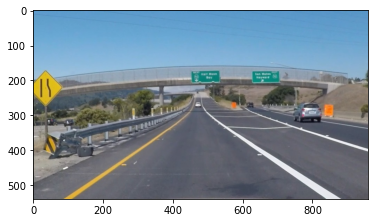

In [21]:
image = mpimg.imread('./data/exit-ramp.jpg')
plt.imshow(image)

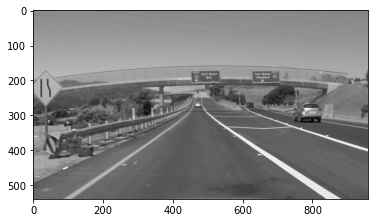

In [28]:
#step1 : gray scale로 변환
gray=cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")

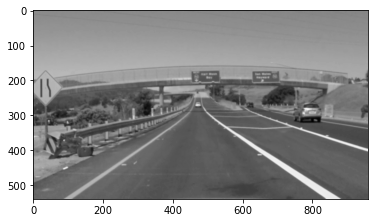

In [29]:
#step2: guassian blurring (option)
kernel_size =5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size),0)
plt.imshow(blur_gray, cmap='gray')

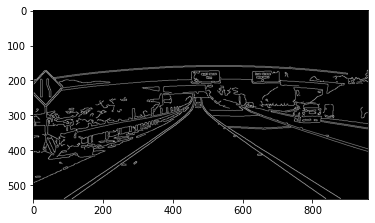

In [30]:
#step3 Edge detect
low_threshold = 50
high_threshold= 150  #low:high의 비율 - 1:2 or 1:3

edges =cv2.Canny(blur_gray, low_threshold, high_threshold)
plt.imshow(edges,cmap='gray')

In [ ]:
#hough transform

In [31]:
#step4 : line detect
rho = 1 #or 2
theta = np.pi/360 #np.pi/360
threshold = 205
minLineLength = 160
maxLineGap =5

lines = cv2.HoughLinesP(edges, rho, theta, threshold,
                 minLineLength=minLineLength,
                 maxLineGap = maxLineGap)

In [32]:
color_edge = cv2.cvtColor(edges,cv2.COLOR2RGB)
color_edge = np.dstack((edges, edges, edges))

AttributeError: module 'cv2' has no attribute 'COLOR2RGB'

In [ ]:
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(__,(x1,y1))

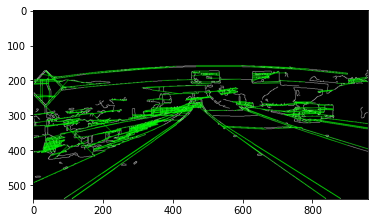

In [33]:
# step 4 : Line detect
rho=1
theta=np.pi/180 #np.pi/360
threshold=30
minLineLength=40
maxLineGap=20
lines=cv2.HoughLinesP(edges, rho, theta, threshold,
               minLineLength=minLineLength,
               maxLineGap=maxLineGap)
# color_edge=cv2.cvtColor(edges, cv2.COLOR_BAYER_BG2RGB)
color_edge=np.dstack((edges, edges, edges)) #line을 red로 그리기위해 channel
for line in lines:
    x1, y1, x2, y2=line[0]
    cv2.line(color_edge, (x1,y1), (x2,y2), (0,255,0), 1, cv2.LINE_AA)
plt.imshow(color_edge, cmap="gray")

In [ ]:
#step 4_2 :Roi Selection

In [ ]:
pts = np.array([[(0,image.shape[0]-1), (450,290),(490,290),(image.shape[1]-1,image.shape)]])

In [ ]:
pts = ###

In [ ]:
##Pipeline 
-Canny Dectection -> Hough  Transform -> ROI Selection

In [ ]:
#종합

In [ ]:
# step 2 : gaussian blurring (option)
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
plt.imshow(blur_gray, cmap="gray")


In [ ]:
# step 3 : Edge detect
low_threshold = 50
high_threshold = 150  # low:high 의 비율 - 1:2 or 1:3

edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
plt.imshow(edges, cmap="gray")


In [ ]:
# step 5 : Line detect
rho = 1
theta = np.pi / 180
threshold = 30
minLineLength = 40
maxLineGap = 20

lines = cv2.HoughLinesP(edges, rho, theta, threshold,
                       minLineLength = minLineLength,
                       maxLineGap = maxLineGap)

# color_edge = cv2.cvtColor(edges, cv2.COLOR2RGB) # line을 red로 그리기 위해 channel을 3차원으로
color_edge = np.dstack((edges, edges, edges)) # line을 red로 그리기 위해 channel을 3차원으로

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(color_edge, (x1, y1), (x2, y2), (255, 0, 0), 2)
    
plt.imshow(color_edge, cmap="gray")
